<div class="alert alert-success">
<b> Комментарий от ревьюера 3</b>

Спасибо, что учел мои комментарии. Ты приложил много усилий, чтобы довести проект до конца, надеюсь, что эта работа помогла тебе лучше понять теорию. Я принимаю проект и желаю удачи в прохождении курса!

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

Привет, Евгений.

Меня зовут Людмила, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на «ты», если не против)

Но если это не удобно — дай знать, и мы перейдем на «вы». Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Мои комментарии будут в ячейках «Комментарий от ревьюера».

---    
<div class="alert alert-block alert-danger">
    
Критическое замечание, которые следует исправить.
</div> 
    
<div class="alert alert-block alert-warning">
    
Замечание\совет на будущее.
</div>
    
<div class="alert alert-block alert-success">
    
Когда всё сделано правильно.
</div>
    
---        
    
Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь 

<div class="alert alert-info">
    
в такую ячейку
</div>

Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.
___

# Аналитика интернет магазина

**Цель исследования:** Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустите A/B-тест и проанализировать результаты.

**Ход исследования:** Данные берем из трех файлов: 
- hypothesis.csv
- orders.csv
- visitors.csv

В которых содержится информация о гипотезах, заказах и пользователях. На основании полученных файлов проведем исследование.

**Этапы исследования:**

- Загрузка данных;
- Приоритизация гипотез;
- Анализ A/B-теста;
- Выводы.

**Описание данных:**

**Гипотезы** — hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

**Заказы** — orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Пользователи** — visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> Хорошо, что во вступительной части ты указываешь всю важную информацию о проекте.
</div>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> Все нужные библиотеки загружены, отлично.
</div>

#### Шаг 1. Загрузка данных

In [2]:
# Загружаем файлы
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',', skipinitialspace = True)
    orders = pd.read_csv('/datasets/orders.csv', sep=',', skipinitialspace = True)
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',', skipinitialspace = True)
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')

In [3]:
# Выведем таблицу и общую информацию
pd.set_option('max_colwidth', 200)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div class="alert alert-block alert-warning">
    

**Комментарий от ревьюера**

Удобнее вывести названия гипотез целиком: `pd.set_option('max_colwidth', 200)`
    

</div>

<div class="alert alert-info">
    
Добавил строку кода, чтобы гипотезу были видны целиком
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Молодец, что отредактировала таблицу, теперь можно легко сравнить гипотезы. 

</div>

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Выведем по 5 строк для понимания что у нас в таблицах и общую информацию
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
# Теперь проверим на явные дубликаты
print("Количество дубликатов в таблице Заказы:", orders.duplicated().sum())

Количество дубликатов в таблице Заказы: 0


<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
При знакомстве с данными нам нужно еще выполнить проверку на дубликаты.
</div>

<div class="alert alert-info">
    
Явных дубликатов в таблице нет.
</div>

In [8]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# Теперь проверим на явные дубликаты
print("Количество дубликатов в таблице Пользователи:", visitors.duplicated().sum())

Количество дубликатов в таблице Пользователи: 0


<div class="alert alert-danger">
<b> Комментарий от ревьюера 2</b>

Таблицу с посетителями тоже надо проверить на дубликаты.

</div>

<div class="alert alert-info">
    
Явных дубликатов так же не нашел.
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 3</b>

Отлично, теперь у нас есть все основные проверки.

</div>

In [11]:
# Проверим, есть ли пользователи, которые принадлежат к двум разным группам
grouped_users = visitors.groupby('visitors')['group'].apply(list)
grouped_orders = orders.groupby('visitorId')['group'].apply(list)

users_in_multiple_groups = [user for user, groups in grouped_users.items() if len(set(groups)) > 1]
users_in_multiple_groups 

[490, 610, 718]

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера 2**
    
3 пользователя - это не совсем верный результат. Чтобы проверить, есть ли пользователи, которые попадают в обе группы, можно, например, сделать так:
    
* выделить списки уникальных id пользователей групп А и B из таблицы orders;
* конвертировать их в множества set:
    
https://python-scripts.com/sets#create-sets

* найти пересечение множеств:
    
https://python-scripts.com/sets#set-intersection
    
При желании функцией len() можно будет посчитать количество таких пользователей. 
    
Также в нашем случае удалять пользователей не нужно. Поскольку таблица с посетителями у нас содержит уже агрегированные данные, ее не получится эффективно очистить.

</div>

In [12]:
visitors.loc[visitors['visitors'] == 490]

,date,group,visitors
29,2019-08-30,A,490
60,2019-08-30,B,490


In [13]:
visitors.loc[visitors['visitors'] == 610]

,date,group,visitors
7,2019-08-08,A,610
39,2019-08-09,B,610


<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Полезно выполнить проверку, не попадают ли какие-то пользователи в обе группы - по таблице с заказами.

</div>

<div class="alert alert-info">
    
После проверки видим что есть три пользователя которые находятся в двух группах. И кажется логичным убрать их из обоих групп.
</div>

Как видим пустых строк у нас нет, но при этом в таблицах Заказов и Пользователей есть столбец с датой. Формат даты - строка. Для удобства расчетов потребуется преобразование формата. 

#### Шаг 2. Приоритизация гипотез

##### Шаг 2.1 Фреймворк ICE

In [14]:
# Добавим столбец с расчетом ICE для гипотез и отсортируем по убыванию. 
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'],2)

hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что округляешь значения в колонке ICE.
</div>

Видим что наиболее перспективные гипотезы по ICE - 8, 0, 7

##### Шаг 2.2 Фреймворк RICE

In [15]:
# Добавим столбец с расчетом RICE для гипотез и отсортируем по убыванию. 
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'],2)

hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что выводишь таблицу дважды, каждый раз с сортировкой по одному из фреймворков - так различия в их работе максимально наглядны.
</div>

В случае с RICE перспективные гипотезы - 7, 2, 0, 6

##### Шаг 2.2 Как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [16]:
# Для удобства еще раз выведем таблицу Гипотез
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


По таблице мы видим что наибольшие Reach и Impact имеет как раз 7 гипотеза. Что и позволяет ей стать наиболее приоритеной в методике RICE. То есть при использовании RICE важное влияние имеют две компоненты:
- Сила гипотезы - Impact;
- Скольких пользоватлей она затронет - Reach.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> Все верно, 7 гипотеза самая приоритетная.
</div>

#### Шаг 3. Анализ A/B-теста

##### Шаг 3.1 График кумулятивной выручки по группам.

In [17]:
# Первым делом преобразуем столбец даты
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [18]:
# Cоздаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [19]:
# Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


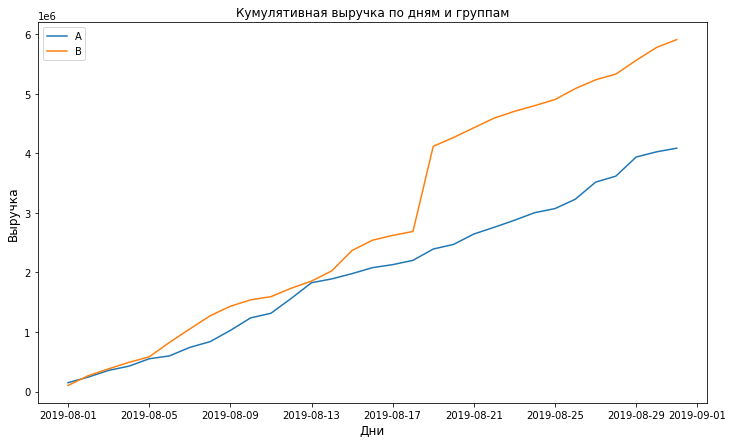

In [20]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Зададим размер графика и подписи
plt.figure(figsize=(12, 7))
plt.xlabel("Дни", size=12)
plt.ylabel("Выручка", size=12)
plt.title("Кумулятивная выручка по дням и группам")

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

Убери, пожалуйста, текстовую строку перед этим и следующими графиками. Для этого в последнюю строку можно добавить ; или добавить последней строкой plt.show().
</div>

<div class="alert alert-info">
    
Графики подправил.
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Теперь графики оформлены очень аккуратно: есть названия, подписи осей, настроен размер 👍
</div>

**Вывод:**

Видим по графику что в обоих группах выручка до 18.08.2019 растет практически равномерно, а вот после в группе В наблюдается значительный прирост.Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

##### Шаг 3.2 График кумулятивного среднего чека по группам.

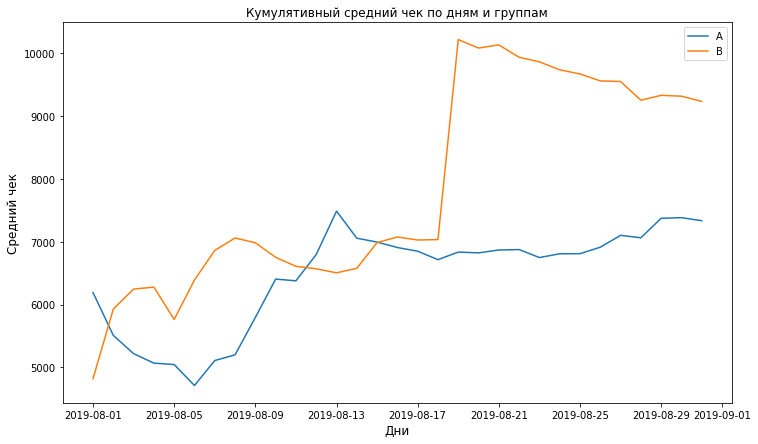

In [21]:
# Зададим размер графика и подписи
plt.figure(figsize=(12, 7))
plt.xlabel("Дни", size=12)
plt.ylabel("Средний чек", size=12)
plt.title("Кумулятивный средний чек по дням и группам")

# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

**Вывод:**

Как и на графике с выручкой видим, что 18.08.2019 в группе В наблюдается резкий скачек. Что может говорить о наличии выбросов и требует дополнительной проверки. При это по группе А средний чек практически стабилизировался.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Да, резкий рост происходит в ту же дату, что и на предыдущем графике.
</div>

##### Шаг 3.3 График относительного изменения кумулятивного среднего чека группы B к группе A.

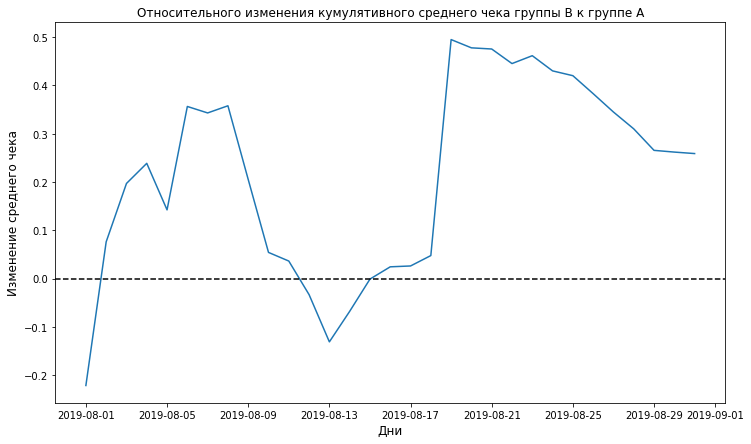

In [22]:
# Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# Зададим размер графика и подписи
plt.figure(figsize=(12, 7))
plt.xlabel("Дни", size=12)
plt.ylabel("Изменение среднего чека", size=12)
plt.title("Относительного изменения кумулятивного среднего чека группы B к группе A")

# Строим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:**

Видим что результаты теста значительно и резко менялись в несколько дат. Видимо в эти даты и были совершены аномальные заказы.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Ты прав, возможно, это влияние крупных заказов и выбросов.
</div>

##### Шаг 3.4 График кумулятивного среднего количества заказов на посетителя по группам.

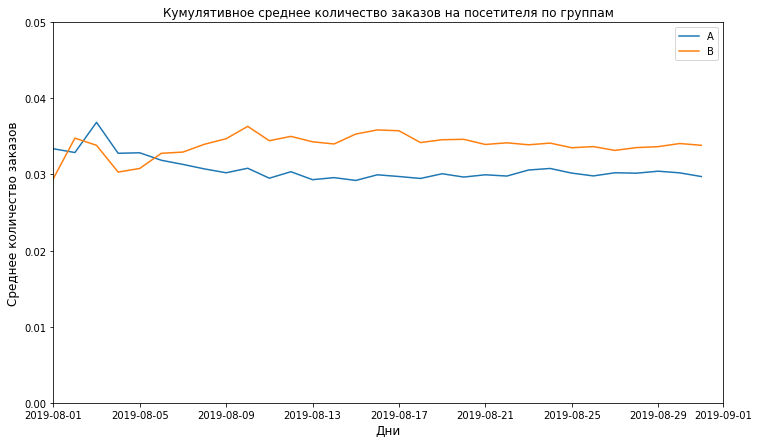

In [23]:
# Посчитаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Зададим размер графика и подписи
plt.figure(figsize=(12, 7))
plt.xlabel("Дни", size=12)
plt.ylabel("Среднее количество заказов", size=12)
plt.title("Кумулятивное среднее количество заказов на посетителя по группам")

# Строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# Задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.050]);

**Вывод:**

По графику видим что в начальных датах теста среднее количество заказов на посетителя группы А было выше. Но со временем данный показатель группы В скорректировался и обошел по значениям группу А. При этом можно сказать что значения величины по группам зафиксировались примерно около одних и тех же значений.

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь и дальше ты называешь один и тот же показатель иногда "конверсией", а иногда "средним количеством заказов на посетителя". Вторая формулировка более корректная, так как для расчета конверсии в чистом виде, нам нужны id посетителей. Поправь, пожалуйста, формулировки, это можно сделать с помощью автозамены: в меню Edit ➡ Find and Replace. 
    
Кнопка со скриншота ниже позволяет сделать замены сразу во всех ячейках:
    
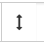
    
</div>

<div class="alert alert-info">
    
Формулировки исправил.
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Все верно, формулировки совпадают.
</div>

##### Шаг 3.5 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

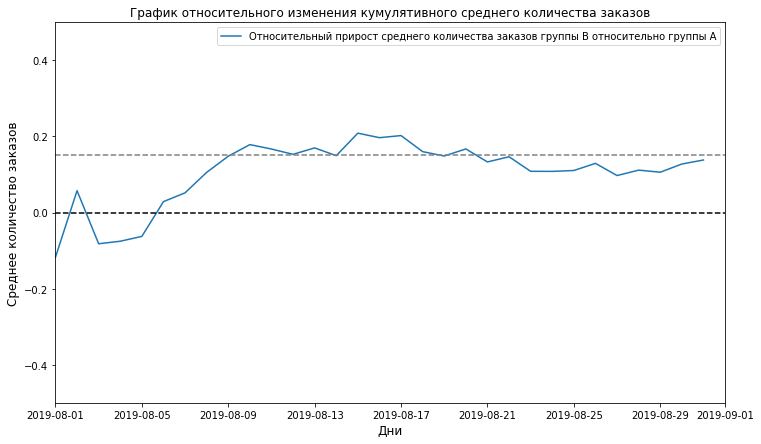

In [24]:
# Объединим таблицы
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Зададим размер графика и подписи
plt.figure(figsize=(12, 7))
plt.xlabel("Дни", size=12)
plt.ylabel("Среднее количество заказов", size=12)
plt.title("График относительного изменения кумулятивного среднего количества заказов")

# Построим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост среднего количества заказов группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5]);

**Вывод:**
    
По графику видим, что среднее количество заказов на посетителя группы В почти с самого начала теста лидирует. И закрепилась в районе 15% лучше чем группа А.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Да, группа В выигрывает на протяжении всего теста.
</div>

##### Шаг 3.6 Точечный график количества заказов по пользователям.

In [25]:
# Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


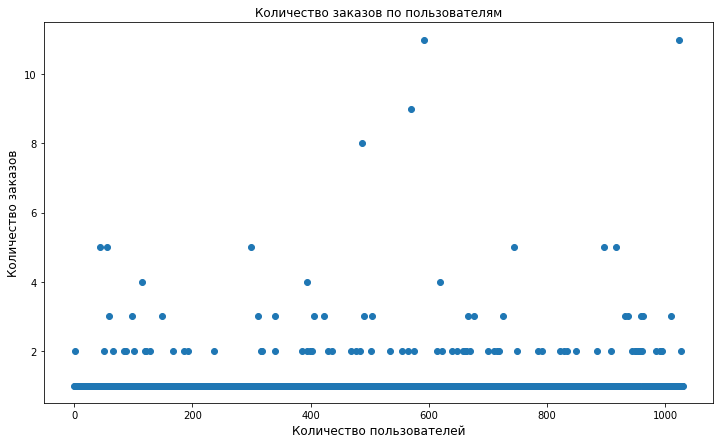

In [26]:
# Построим график
x_values = pd.Series(range(0,len(ordersByUsers)))

# Зададим размер графика и подписи
plt.figure(figsize=(12, 7))
plt.xlabel("Количество пользователей", size=12)
plt.ylabel("Количество заказов", size=12)
plt.title("Количество заказов по пользователям")

plt.scatter(x_values, ordersByUsers['orders']);

**Вывод:**

По графику видим что большая часть пользователей соверщает 1-2 заказа. Начиная с 3 заказов количество таких пользователей значительно сокращается. Можно предположить что количество заказов более 3 являеются аномальным.

##### Шаг 3.7 95-й и 99-й перцентили количества заказов на пользователя.

In [27]:
# Расчитаем перцинтили
pam = np.percentile(ordersByUsers['orders'], [90, 95, 99])
pam

array([1., 2., 4.])

**Вывод:**

Из расчета перцентилей видим, что не больше 5% пользоватлей оформляли более 2 заказов, а не более 1% больше 4. Поэтому целесообразно взять 2 заказа на одного пользователя за верхнюю границу числа заказов.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Такое определение выбросов для количества заказов корректно.
</div>

##### Шаг 3.8 Точечный график стоимостей заказов.

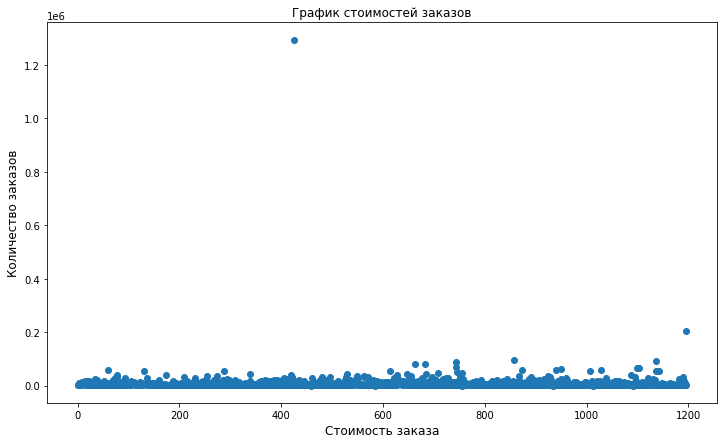

In [28]:
# Построим график
x_values = pd.Series(range(0, len(orders['revenue'])))

# Зададим размер графика и подписи
plt.figure(figsize=(12, 7))
plt.xlabel("Стоимость заказа", size=12)
plt.ylabel("Количество заказов", size=12)
plt.title("График стоимостей заказов")

plt.scatter(x_values, orders['revenue']);

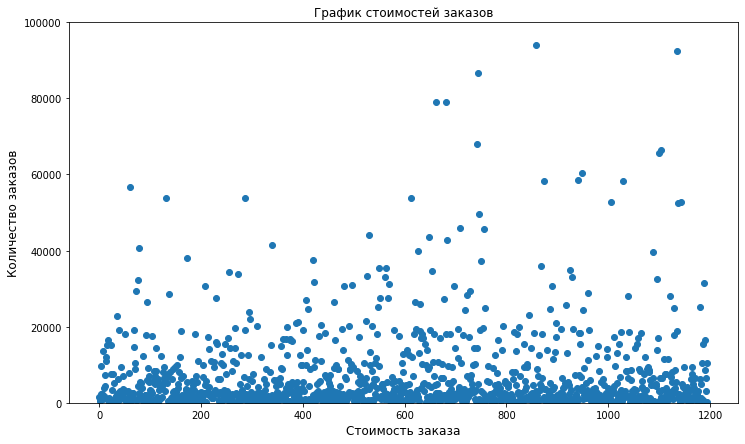

In [29]:
# Посмотрим более детально
plt.figure(figsize=(12, 7))
plt.xlabel("Стоимость заказа", size=12)
plt.ylabel("Количество заказов", size=12)
plt.title("График стоимостей заказов")
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue']);

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Полезно добавить еще один график, ограничив значения по оси Y. Чтобы двух явных выбросов не было видно, а мы могли рассмотреть основную часть заказов.

</div>

<div class="alert alert-info">
    
График добавил.
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**
    
Удобно, когда можно рассмотреть и выбросы, и основную часть заказов.
</div>

**Вывод:**

По графику видим что есть явные выбросы в районе 200 тыс и 1 млн 200 тыс. При этом большая часть заказов не превышает 50 тыс. Чтобы более точно определить выбросы так же найдем перцентили.

##### Шаг 3.9 95-й и 99-й перцентили стоимости заказов.

In [30]:
# Найдем перцентили
pco = np.percentile(orders['revenue'], [90, 95, 99])
pco

array([18168. , 28000. , 58233.2])

**Вывод:**

Из расчета перцентилей видим, что не больше 5% заказов дороже 28 тыс, а не более 1% дороже 59 тыс. Поэтому целесообразно взять 28 тыс. за верхнюю границу числа заказов.

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Такой выбор границы выбросов получается не совсем удобным. Если сейчас тебя спросят, по какому перцентилю ты провел границу выбросов, ты не сможешь точно ответить. Лучше определять выбросы по тому перцентилю, показатели по которому были рассчитаны. Или рассчитать перцентиль для той стоимости заказов, которую ты выбираешь как границу выбросов.

</div>

<div class="alert alert-info">
    
С коментариями однозначно согласен. Только смущает что в уроке в обоих задачах бралась величина между 95 и 99 перцентилем.
Исправил вержнюю границу на 95 перцентиль.
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**
    
В уроке такой выбор мог быть сделан для упрощения, чтобы границу выбросов было лучше видно в коде.
</div>

##### Шаг 3.10 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.


Начнем с того что у нас будет две гипотезы:
- Нулевая: Статистически значимых различий в среднем количестве заказов между группами нет. 
- Альтернативная: Статистически значимые различия в среднем количестве заказов между группами есть.

Для проверки будем использовать непараметрический тест Уилкоксона-Манна-Уитни. Так как есть предположения что у нас имеются выбросы.

Возьмем alpha = 0,05

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**
    
Формулировки гипотез можно дополнить, чтобы в них было указание на то, что нас интересуют именно статистически значимые различия. Например, так:
 
**Нулевая гипотеза** Статистически значимых различий в ... между группами по ... данным нет.

**Альтернативная гипотеза** Статистически значимые различия в ... между группами по ... данным есть.
  
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Нужно еще указать выбранное значение alpha перед проверкой и пояснить, какой метод будет использоваться для проверки гипотез и почему.
</div>

<div class="alert alert-info">
    
Скорректировал описание гипотез, добавил альфа и метод.
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Хорошо получилось, так сразу понятна суть расчета.
</div>

In [31]:
# Соберем таблицу с пользователями по группе А и с заказами
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Повторим действия для группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# В результате все полученные таблицы смержим в одну
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,24,148579,21,101217,719,713
1,2019-08-02,20,93822,24,165531,619,581
2,2019-08-03,24,112473,16,114248,507,509
3,2019-08-04,16,70825,17,108571,717,770
4,2019-08-05,25,124218,23,92428,756,707


<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Этот код можно сократить: нам не нужно собирать кумулятивные данные для проверки гипотез, потому что это уже сделано выше.

</div>

<div class="alert alert-info">
    
Код скорректировал.
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**
    
Здесь надо было сделать немного по-другому. Не удалять часть кода с группой А, а удалить из него все, у чего cumulative в названии (в том числе из объединения в таблицу). Когда будет готово, проверь, пожалуйста, что код не падает: перезапусти все ячейки (в меню Kernel > Restart & Run All).
</div>

<div class="alert alert-info">
    
Теперь работает
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 3</b>

Да, теперь проект запустился полностью. 

</div>

In [32]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [33]:
# Дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам 
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, 
                               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],
                     axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, 
                               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],
                     axis=0)

In [34]:
# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
# Выведем относительный прирост среднего числа заказов группы B. Округлим до трёх знаков после запятой

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("различия: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
различия: 0.138


<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Если заменить display на print, кавычки пропадут.

</div>

<div class="alert alert-info">
    
Исправил на print.
</div>

**Вывод:**

P-value меньше стандартных 0,05, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных показывает, что в среднем количестве заказов между группами есть статистически значимые отличия. Относительный прирост среднего группы В к показателю группы А равен 13,8%.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, отвергаем нулевую гипотезу: между группами есть статистически значимое различие.
</div>

##### Шаг 3.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Для проверки статистической значимости различий в среднем чеке заказа между группами по «сырым» данным будем использовать такие гипотезы:
- Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: Статистически значимые различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

In [35]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                     orders[orders['group']=='B']['revenue'])[1]))
print('различия: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
                                   /orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
различия: 0.259


**Вывод:**

P-value больше 0,05 следовательно нулевую гипотезу мы не отвергаем. Статистически значимых отличий в среднем чеке нет. Относительное различие между сегментами 25,9%

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

Здесь и в следующих двух расчетах надо также указать, можем ли мы отвергнуть нулевую гипотезу.
</div>

<div class="alert alert-info">
    
Указал.
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Да, здесь мы не можем отвергнуть нулевую гипотезу.
</div>

##### Шаг 3.12 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 30 000 рублей.

In [36]:
# Так как таблицы ordersByUsersA и ordersByUsersB у нас уже есть, будем использовать их для фильтрации по нужным нам критериям
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > pam[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > pam[1]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > pco[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Посмотрим сколько в таком случае будет аномальных пользователей
abnormalUsers.shape[0]

74

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Лучше избегать ручного ввода значений при фильтрации: можно использовать непосредственно результат расчета выбранного перцентиля. 

</div>

<div class="alert alert-info">
    
Исправил код.
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Так не придется менять вписанные вручную числа, если поменяются данные.
</div>

Видим что всего получилось 74 пользователя кто совершил 3 и более заказа или приобрел на сумму более 28000 рублей.

Еще раз укажем гипотезы:
- Нулевая: Статистически значимых различий в среднем количестве заказов между группами нет.
- Альтернативная: Статистически значимые различия в среднем количестве заказов между группами есть.

Для проверки будем использовать непараметрический тест Уилкоксона-Манна-Уитни. 

alpha = 0,05

In [37]:
# Узнаем, как их действия повлияли на результаты теста
# Создаем переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах.
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь и в следующем вопросе нужно заново сформулировать гипотезы, чтобы для каждого расчета было полное описание. Желательно также повторить значение alpha и метод проверки. 
    
</div>

<div class="alert alert-info">
    
Тоже исправил.
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Отлично, теперь для каждого расчета есть полное описание.
</div>

In [38]:
# Считаем p-value и относительный прирост
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('различия: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
различия: 0.173


**Вывод:**

Хотя p-value снизился, результат при этом остается тем же. Нулевую гипотезу мы отвергаем. В среднем количестве заказов между группами есть статистически значимые отличия. Относительный прирост среднего группы В к группе А увеличился до 17,3%

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, при анализе "очищенных данных" p-value стало еще меньше и все так же меньше 0.05, следовательно, между группами есть статистически значимые различия.
</div>

##### Шаг 3.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Наши гипотезы:
- Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами нет.
- Альтернативная гипотеза: Статистически значимые различия в среднем чеке между группами есть.

Для проверки будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

alpha = 0,05

In [39]:
# Проверим различия в среднем чеке
print('p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('различия: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


p-value: 0.738
различия: -0.020


<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

Здесь оба числа подписаны как p-value, поправь это, пожалуйста.
</div>

<div class="alert alert-info">
    
Исправил
</div>

**Вывод:**

Видим, что статистически значимых отличий в среднем чеке все так же нет. Нулевую гипотезу мы не отвергаем. Относительное различие между сегментами снизилось до -2,0%

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, здесь видно, как на относительные различия повлияли выбросы.
</div>

#### Шаг 4. Выводы

- В среднем количестве заказов между группами есть статистически значимые отличия как по "сырым" данным, так и после фильтрации аномалий.
- Статистически значимых отличий в среднем чеке нет.
- График различия средниго количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A. Прирост группы В закрепился в районе 15%.
- График среднего чека показывает что результаты группы В лучше.
- При этом каких-то явных аномалий влияющих на реузльтат мы не выявили.

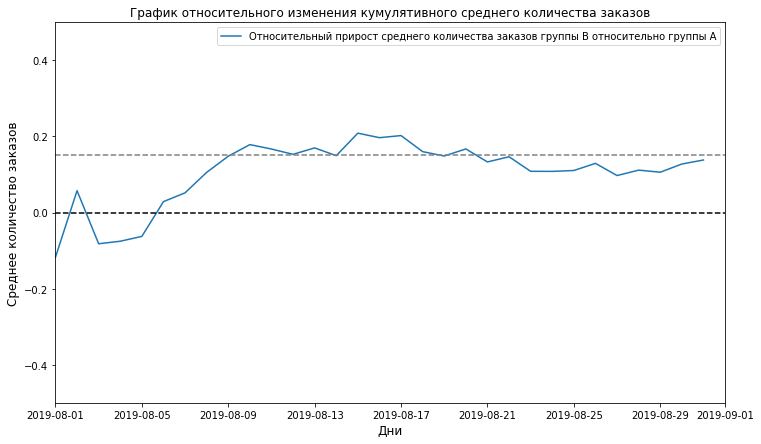

In [40]:
# Зададим размер графика и подписи
plt.figure(figsize=(12, 7))
plt.xlabel("Дни", size=12)
plt.ylabel("Среднее количество заказов", size=12)
plt.title("График относительного изменения кумулятивного среднего количества заказов")

# Построим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост среднего количества заказов группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5]);

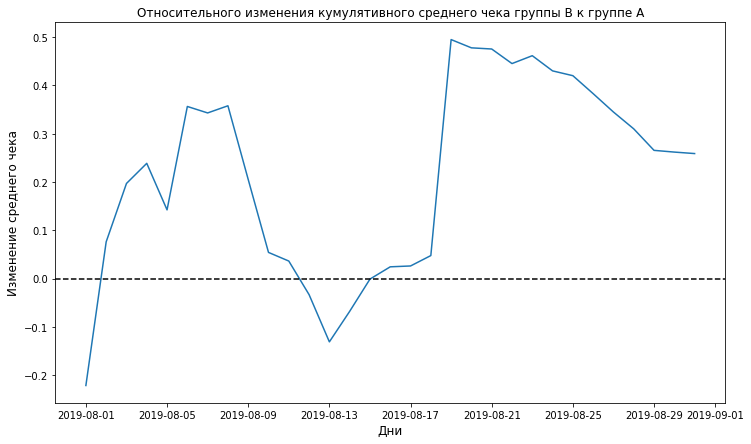

In [41]:
# Зададим размер графика и подписи
plt.figure(figsize=(12, 7))
plt.xlabel("Дни", size=12)
plt.ylabel("Изменение среднего чека", size=12)
plt.title("Относительного изменения кумулятивного среднего чека группы B к группе A")

# Строим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В результате проделанной работы приходим к выводу, что нужно остановить тест и зафиксировать победу группы В.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Верно, данных для принятия решения у нас уже достаточно. 
</div>

<div class="alert alert-block alert-info">

<b>Итоговый комментарий ревьюера:</b>

Благодарю тебя за выполнение проекта. Вижу ты постарался, когда работал над ним. Однако, в проекте есть несколько замечаний, которые надо исправить:

* добавить проверку на дубликаты;
* дополнить оформление графиков;
* разобраться со средним количеством заказов и конверсией;
* дополнить описание статистических расчетов.
       
Жду проект после доработки. Уверена, ты справишься. 💪
</div>

<div class="alert alert-block alert-info">

<b>Итоговый комментарий ревьюера 2:</b>

Замечания, которые осталось исправить:

* добавить проверку на дубликаты в таблице с посетителями;
* убрать ошибку кода.
       
</div>